#Assignment: Analysis of Top-Grossing Concert Tours
Objective:
The goal of this assignment is to clean, preprocess, and visualize the dataset of the top-grossing
concert tours. You will perform data cleaning, handle missing values, convert data types, and
generate meaningful insights through visualizations.


In [1]:
import numpy as np
import pandas as pd

In [2]:
tour=pd.read_csv('/content/my_file (1).csv')
tour

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


##Task 1: Data Cleaning and Preprocessing
1. Load the dataset and inspect the first few rows.
2. Identify and handle missing values, if any.
3. Convert monetary columns (Actual Gross, Adjusted Gross) into numerical format.
4. Convert the Shows and Average Gross columns into numerical format.
5. Extract the start and end years from the Year(s) column and create separate columns for
them.
6. Normalize the artist names by removing special characters

In [3]:
#Load the dataset and inspect the first few rows
tour.head(3)

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]


In [4]:
tour.rename(columns = {'Actual\xa0gross':'Actual Gross'},inplace = True)
tour.rename(columns={'Adjusted\xa0gross (in 2022 dollars)':'Adjusted gross (in 2022 dollars)'},inplace=True)
tour.rename(columns={'Ref.':'Ref'},inplace=True)


In [5]:
tour.columns.tolist()

['Rank',
 'Peak',
 'All Time Peak',
 'Actual Gross',
 'Adjusted gross (in 2022 dollars)',
 'Artist',
 'Tour title',
 'Year(s)',
 'Shows',
 'Average gross',
 'Ref']

In [6]:
print(tour.info())
tour.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual Gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref                               20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB
None


,0
Rank,19
Peak,7
All Time Peak,6
Actual Gross,20
Adjusted gross (in 2022 dollars),20
Artist,9
Tour title,20
Year(s),16
Shows,18
Average gross,20


In [7]:
#Identify and handle missing values, if any.

tour.isnull().sum()
#dropna
tour.dropna(subset=["Peak"])
#fillna
tour.fillna(0)



,Rank,Peak,All Time Peak,Actual Gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],0,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],0,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,0,0,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,0,0,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,0,0,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


In [8]:
#2)Convert monetary columns (Actual Gross, Adjusted Gross) into numerical format.

In [9]:
tour.head(2)

,Rank,Peak,All Time Peak,Actual Gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]


In [10]:
#removing dollar signs and commaas from the values
tour['Actual Gross']=tour['Actual Gross'].str.replace('$','').str.replace(',','')
tour['Adjusted gross (in 2022 dollars)']=tour['Adjusted gross (in 2022 dollars)'].str.replace('$','').str.replace(',','')
tour['Average gross']=tour['Average gross'].str.replace('$','').str.replace(',','')


In [11]:
#removing noive value from the Actual Gross	columns

tour['Actual Gross'] = tour['Actual Gross'].replace({'229100000[b]':'229100000','167700000[e]':'167700000'})


In [12]:
#convering to object to int integer
tour[['Actual Gross','Adjusted gross (in 2022 dollars)','Average gross']]=tour[['Actual Gross','Adjusted gross (in 2022 dollars)','Average gross']].astype(int)


#shows already in integer format

In [13]:
tour.dtypes

,0
Rank,int64
Peak,object
All Time Peak,object
Actual Gross,int64
Adjusted gross (in 2022 dollars),int64
Artist,object
Tour title,object
Year(s),object
Shows,int64
Average gross,int64


In [16]:
data=tour['Year(s)'].str.split('–')
data

,Year(s)
0,"[2023, 2024]"
1,[2023]
2,"[2008, 2009]"
3,"[2018, 2019]"
4,[2018]
5,[2012]
6,"[2008, 2009]"
7,"[2023, 2024]"
8,[2016]
9,[2015]


In [24]:
tour[["start year",'end year']]=tour['Year(s)'].str.split('–',expand =True)
tour['end year']=tour['end year'].fillna(tour['start year'])

In [25]:
tour

,Rank,Peak,All Time Peak,Actual Gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref,start year,end year
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,[1],2023,2024
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3],2023,2023
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294,[6],2008,2009
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7],2018,2019
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8],2018,2018
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9],2012,2012
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11],2008,2009
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023–2024,41,6282927,[12],2023,2024
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13],2016,2016
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,2945882,[14],2015,2015


In [27]:
#removing special characters from artist name
tour['Artist']=tour['Artist'].replace({'Beyoncé':'Beyonce'})
tour

,Rank,Peak,All Time Peak,Actual Gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref,start year,end year
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,[1],2023,2024
1,2,1,7[2],579800000,579800000,Beyonce,Renaissance World Tour,2023,56,10353571,[3],2023,2023
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294,[6],2008,2009
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7],2018,2019
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8],2018,2018
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9],2012,2012
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11],2008,2009
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023–2024,41,6282927,[12],2023,2024
8,9,NaN,NaN,256084556,312258401,Beyonce,The Formation World Tour,2016,49,5226215,[13],2016,2016
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,2945882,[14],2015,2015


#Task 2: Exploratory Data Analysis (EDA) and Visualization
1. Find the artist with the highest total gross earnings.
2. Identify the artist with the highest average gross per show.
3. Determine the most frequent artists in the dataset.
4. Plot the distribution of total gross earnings for the tours.
5. Create a bar chart of the top 10 highest-grossing tours.
6. Show the trend of total tour earnings over different years.

In [43]:
#Find the artist with the highest total gross earnings.
tour.set_index('Actual Gross').sort_index(ascending=False).head(1).reset_index()


,Actual Gross,Rank,Peak,All Time Peak,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref,start year,end year
0,780000000,1,1,2,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,[1],2023,2024


In [41]:
#Identify the artist with the highest average gross per show.
tour.set_index('Average gross').sort_index(ascending=False).head(1).reset_index()

,Average gross,Rank,Peak,All Time Peak,Actual Gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Ref,start year,end year
0,13928571,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,[1],2023,2024


In [53]:
#Determine the most frequent artists in the dataset.
tour['Artist'].value_counts().head(1)

,count
Artist,
Taylor Swift,4


<Axes: ylabel='Frequency'>

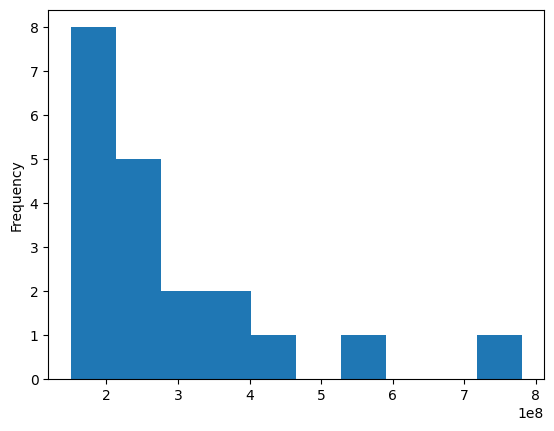

In [61]:
#Plot the distribution of total gross earnings for the tours.
import matplotlib.pyplot as plt
import seaborn as sns
tour['Actual Gross'].plot(kind='hist')

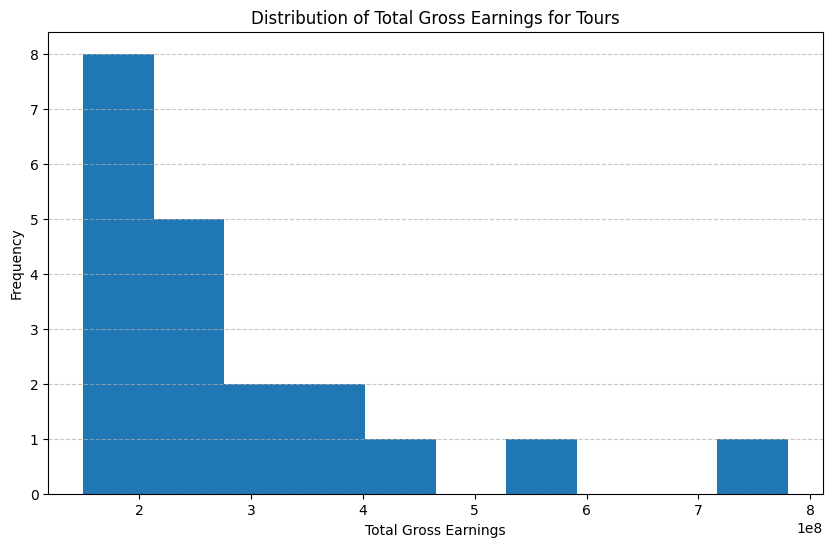

In [63]:
#Create a bar chart of the top 10 highest-grossing tours.
tour.head()



,Rank,Peak,All Time Peak,Actual Gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref,start year,end year
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,[1],2023,2024
1,2,1,7[2],579800000,579800000,Beyonce,Renaissance World Tour,2023,56,10353571,[3],2023,2023
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294,[6],2008,2009
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7],2018,2019
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8],2018,2018


<Axes: xlabel='Actual Gross'>

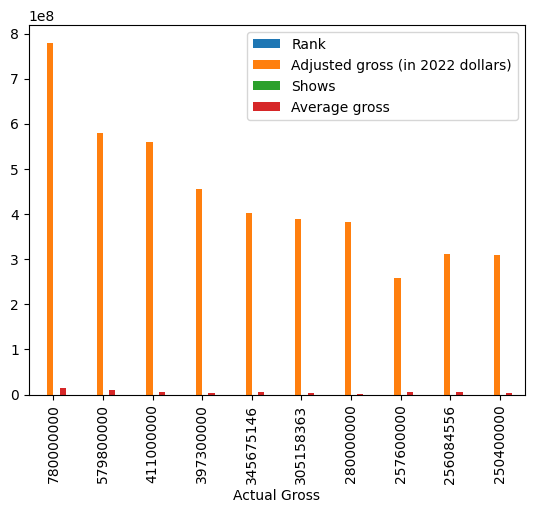

In [67]:
top10=tour.set_index('Actual Gross').sort_index(ascending=False).head(10)
top10.plot(kind='bar')

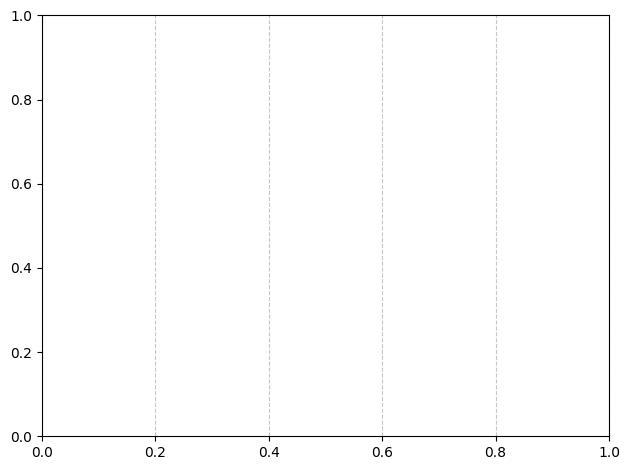

<Axes: >

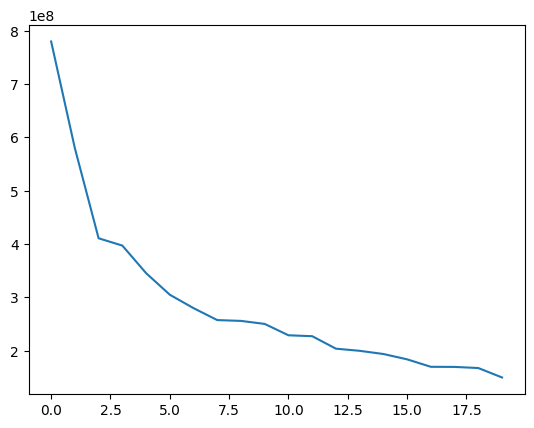

In [75]:
#Show the trend of total tour earnings over different years.
tour['Actual Gross'].plot(kind='line')

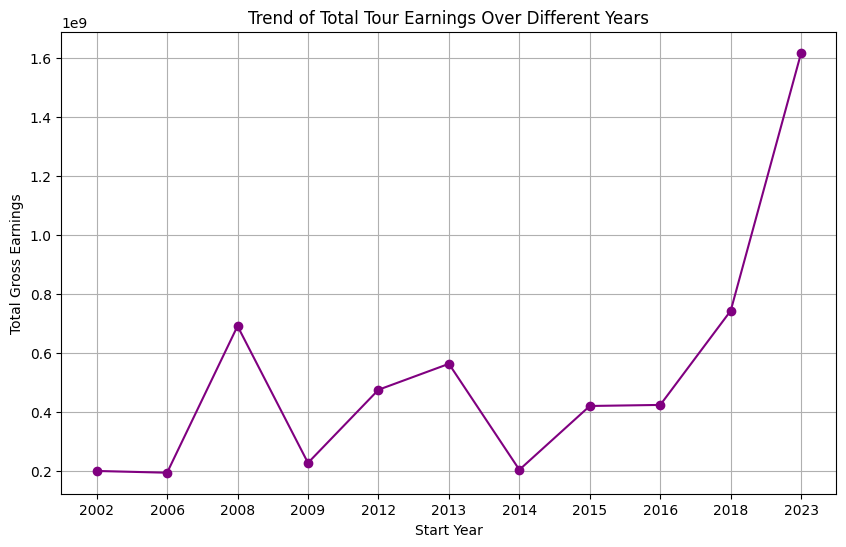

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total earnings per start year  (ask)
yearly_earnings = tour.groupby('start year')['Actual Gross'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_earnings['start year'], yearly_earnings['Actual Gross'], marker='o', linestyle='-', color='purple')
plt.title('Trend of Total Tour Earnings Over Different Years')
plt.xlabel('Start Year')
plt.ylabel('Total Gross Earnings')
plt.grid(True)
plt.show()